In [2]:
%reset
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../")
import torch
import numpy as np
import defmod as dm
import multimodule_usefulfunctions as mm 
import matplotlib.pyplot as plt

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
nb_pts1 = 10
nb_pts2 = 7
dim = 2

o1 = torch.tensor([1,1]).float()
o2 = torch.tensor([5,5]).float()
origin = [o1,o2]
radius = [2,1]
numberPoints = [nb_pts1, nb_pts2]
gd_list = mm.multipleCircles(origin, radius, numberPoints)

In [81]:
points_in_region1 = lambda points: mm.pointInCircle(points, o1, radius[0])
points_in_region2 = lambda points: mm.pointInCircle(points, o2, radius[1])
points_in_region = [points_in_region1, points_in_region2]

In [88]:
sigma1 = 1
manifold1 = dm.manifold.Landmarks(dim, nb_pts1, gd=gd_list[0].view(-1))
trans1 = dm.deformationmodules.Translations(manifold1, sigma1)

sigma2 = 1
manifold2 = dm.manifold.Landmarks(dim, nb_pts2, gd=gd_list[1].view(-1))
trans2 = dm.deformationmodules.Translations(manifold2, sigma2)

module_list = [trans1, trans2]
modules = dm.multishape.MultiShapeModule(module_list, points_in_region,1)

In [89]:
points = 7*torch.rand([10,2])
points_in_region1(points)
points_in_region2(points)


[False, False, False, False, False, True, False, True, False, False]

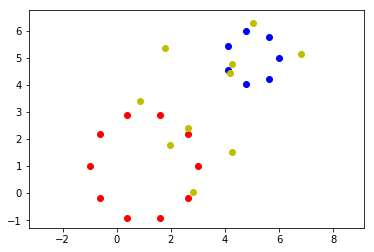

In [90]:
plt.scatter(gd_list[0][:, 0].detach().numpy(), gd_list[0][:, 1].detach().numpy(), c='red')
plt.scatter(gd_list[1][:, 0].detach().numpy(), gd_list[1][:, 1].detach().numpy(), c='blue')

plt.scatter(points[:,0].numpy(), points[:,1].numpy(), c='y')

plt.axis('equal')
plt.show()

In [91]:
trans1.fill_controls(torch.rand(nb_pts1,dim))
trans2.fill_controls(torch.rand(nb_pts2,dim))
modules.backgroundmodule.fill_controls([trans1.controls, trans2.controls])

fields = [trans1.field_generator(), trans2.field_generator()]
multifield = dm.structuredfield.StructuredField_multi(fields, points_in_region)

In [92]:
multifield(points)

tensor([[0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [1.6679, 2.2549],
        [0.7266, 0.4013],
        [1.4367, 1.9371],
        [0.0000, 0.0000],
        [0.0000, 0.0000]], grad_fn=<AddBackward0>)

In [93]:
points

tensor([[5.0532, 6.2844],
        [2.8080, 0.0603],
        [1.7939, 5.3804],
        [4.2685, 1.5049],
        [6.8284, 5.1324],
        [4.2788, 4.7826],
        [1.9855, 1.7846],
        [4.1972, 4.4582],
        [2.6359, 2.3905],
        [0.8465, 3.4235]])

In [94]:
vs = modules.field_generator()
vs(points)
# field generator seems to work!

tensor([[1.5580, 2.2426],
        [0.9308, 1.0108],
        [0.0943, 0.0823],
        [0.1780, 0.2072],
        [0.8046, 1.3302],
        [1.6679, 2.2549],
        [0.7266, 0.4013],
        [1.4367, 1.9371],
        [0.6902, 0.2665],
        [0.7136, 0.6548]], grad_fn=<AddBackward0>)

In [95]:
modules(points)
# call function seems to work!

tensor([[1.5580, 2.2426],
        [0.9308, 1.0108],
        [0.0943, 0.0823],
        [0.1780, 0.2072],
        [0.8046, 1.3302],
        [1.6679, 2.2549],
        [0.7266, 0.4013],
        [1.4367, 1.9371],
        [0.6902, 0.2665],
        [0.7136, 0.6548]], grad_fn=<AddBackward0>)

In [96]:
modules.cost()

tensor(27.5008, grad_fn=<AddBackward0>)

In [97]:
trans1.cost(), trans2.cost(), modules.backgroundmodule.cost()

(tensor(4.7680, grad_fn=<MulBackward0>),
 tensor(8.9788, grad_fn=<MulBackward0>),
 tensor(13.7541, grad_fn=<MulBackward0>))

In [98]:
dm.constraints.Identity(modules.field_generator().fields, modules.manifold)()

field module: tensor([[0.6309, 0.6734],
        [0.6652, 0.2836],
        [0.9839, 0.4269],
        [0.6774, 1.0522],
        [0.6589, 1.4616],
        [1.1183, 1.6184],
        [0.7908, 1.3201],
        [0.6885, 0.8051],
        [1.0667, 0.9329],
        [1.0293, 1.0723]], grad_fn=<AsStridedBackward>)
field background: tensor([[0.6322, 0.6754],
        [0.6780, 0.3027],
        [0.9883, 0.4326],
        [0.6775, 1.0523],
        [0.6589, 1.4616],
        [1.1183, 1.6184],
        [0.7908, 1.3201],
        [0.6885, 0.8051],
        [1.0667, 0.9329],
        [1.0293, 1.0724]], grad_fn=<AddBackward0>)
field module: tensor([[1.6973, 2.5657],
        [1.7547, 2.6968],
        [1.8174, 2.5544],
        [1.6096, 2.1606],
        [1.4040, 1.8889],
        [1.5450, 2.0620],
        [1.7242, 2.3088]], grad_fn=<AsStridedBackward>)
field background: tensor([[1.6973, 2.5657],
        [1.7547, 2.6968],
        [1.8174, 2.5544],
        [1.6113, 2.1608],
        [1.4163, 1.8905],
        [1.5510, 2.

tensor([[-1.2766e-03, -2.0595e-03],
        [-1.2811e-02, -1.9112e-02],
        [-4.3998e-03, -5.6911e-03],
        [-7.2002e-05, -8.2374e-05],
        [-1.7881e-07, -2.3842e-07],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -5.9605e-08],
        [-7.8678e-06, -1.3351e-05],
        [-1.6212e-05, -3.5763e-06],
        [-6.7949e-06, -9.5367e-07],
        [-5.9128e-05, -5.4836e-06],
        [-1.7433e-03, -1.6594e-04],
        [-1.2330e-02, -1.5937e-03],
        [-6.0303e-03, -1.4553e-03],
        [-3.5715e-04, -1.1039e-04]], grad_fn=<CatBackward>)

In [99]:
fields = modules.field_generator().fields
manifold = modules.manifold
Id_constr = dm.constraints.Identity(fields, manifold)

Id_constr.constraintsmatrix()
Id_constr()

field module: tensor([[0.6309, 0.6734],
        [0.6652, 0.2836],
        [0.9839, 0.4269],
        [0.6774, 1.0522],
        [0.6589, 1.4616],
        [1.1183, 1.6184],
        [0.7908, 1.3201],
        [0.6885, 0.8051],
        [1.0667, 0.9329],
        [1.0293, 1.0723]], grad_fn=<AsStridedBackward>)
field background: tensor([[0.6322, 0.6754],
        [0.6780, 0.3027],
        [0.9883, 0.4326],
        [0.6775, 1.0523],
        [0.6589, 1.4616],
        [1.1183, 1.6184],
        [0.7908, 1.3201],
        [0.6885, 0.8051],
        [1.0667, 0.9329],
        [1.0293, 1.0724]], grad_fn=<AddBackward0>)
field module: tensor([[1.6973, 2.5657],
        [1.7547, 2.6968],
        [1.8174, 2.5544],
        [1.6096, 2.1606],
        [1.4040, 1.8889],
        [1.5450, 2.0620],
        [1.7242, 2.3088]], grad_fn=<AsStridedBackward>)
field background: tensor([[1.6973, 2.5657],
        [1.7547, 2.6968],
        [1.8174, 2.5544],
        [1.6113, 2.1608],
        [1.4163, 1.8905],
        [1.5510, 2.

tensor([[-1.2766e-03, -2.0595e-03],
        [-1.2811e-02, -1.9112e-02],
        [-4.3998e-03, -5.6911e-03],
        [-7.2002e-05, -8.2374e-05],
        [-1.7881e-07, -2.3842e-07],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -5.9605e-08],
        [-7.8678e-06, -1.3351e-05],
        [-1.6212e-05, -3.5763e-06],
        [-6.7949e-06, -9.5367e-07],
        [-5.9128e-05, -5.4836e-06],
        [-1.7433e-03, -1.6594e-04],
        [-1.2330e-02, -1.5937e-03],
        [-6.0303e-03, -1.4553e-03],
        [-3.5715e-04, -1.1039e-04]], grad_fn=<CatBackward>)

In [100]:
torch.cat([ fields[0](manifold.gd[0].view(-1, dim)),  fields[1](manifold.gd[1].view(-1, dim)),  fields[2](torch.cat([*manifold.gd[2]], 0).view(-1, dim))], 0)

tensor([[0.6309, 0.6734],
        [0.6652, 0.2836],
        [0.9839, 0.4269],
        [0.6774, 1.0522],
        [0.6589, 1.4616],
        [1.1183, 1.6184],
        [0.7908, 1.3201],
        [0.6885, 0.8051],
        [1.0667, 0.9329],
        [1.0293, 1.0723],
        [1.6973, 2.5657],
        [1.7547, 2.6968],
        [1.8174, 2.5544],
        [1.6096, 2.1606],
        [1.4040, 1.8889],
        [1.5450, 2.0620],
        [1.7242, 2.3088],
        [0.6322, 0.6754],
        [0.6780, 0.3027],
        [0.9883, 0.4326],
        [0.6775, 1.0523],
        [0.6589, 1.4616],
        [1.1183, 1.6184],
        [0.7908, 1.3201],
        [0.6885, 0.8051],
        [1.0667, 0.9329],
        [1.0293, 1.0724],
        [1.6973, 2.5657],
        [1.7547, 2.6968],
        [1.8174, 2.5544],
        [1.6113, 2.1608],
        [1.4163, 1.8905],
        [1.5510, 2.0634],
        [1.7246, 2.3089]], grad_fn=<CatBackward>)